## **DATA COLLECTION**

**Loading the Dataset**

In [1]:
import pandas as pd

In [2]:
data =pd.read_csv('Heart Disease data.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### **DATA PREPROCESSING**

**Data Cleaning**

In [5]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

**Outlier Detection and Removal**

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
def outlier(str,column):
  plt.figure(figsize=(8,6))
  sns.boxplot(data[column])
  plt.title(f'Box Plot of {column} {str}')
  plt.show()


Before Removing Outliers


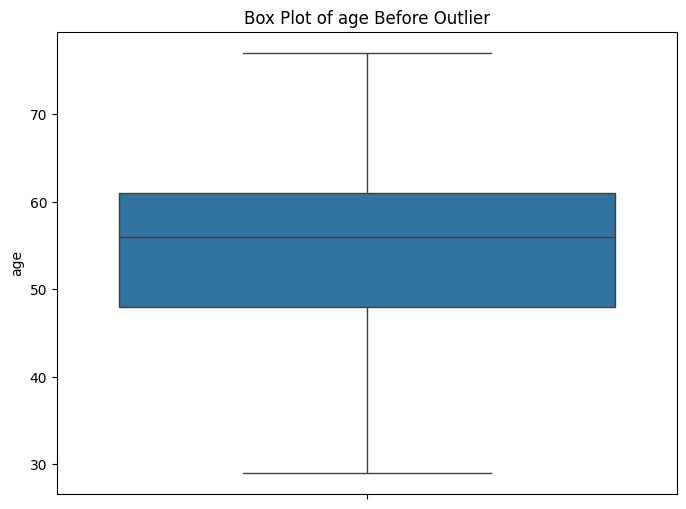

After Removing Outliers


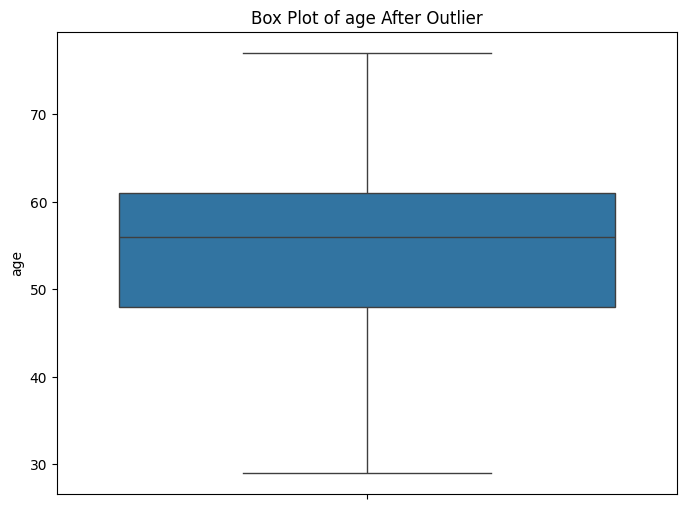

Before Removing Outliers


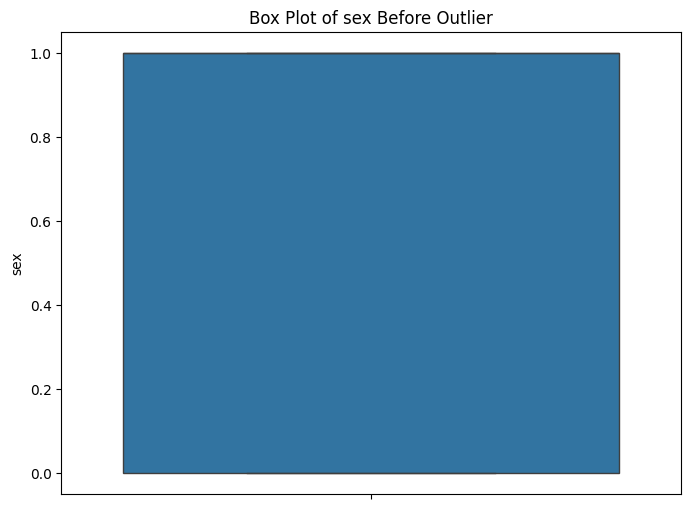

After Removing Outliers


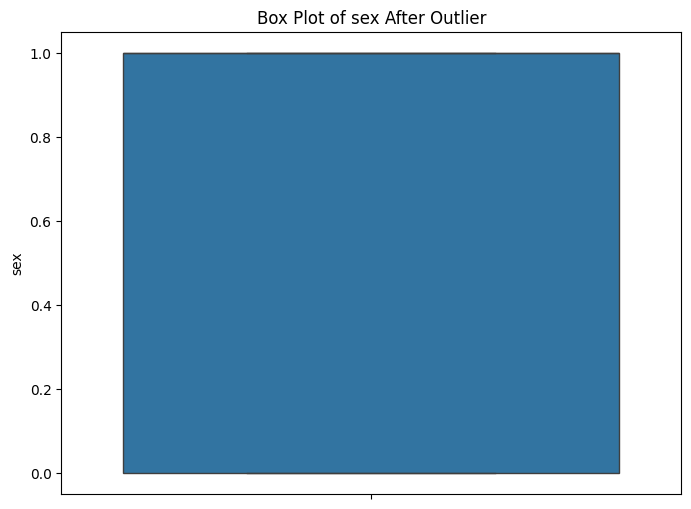

Before Removing Outliers


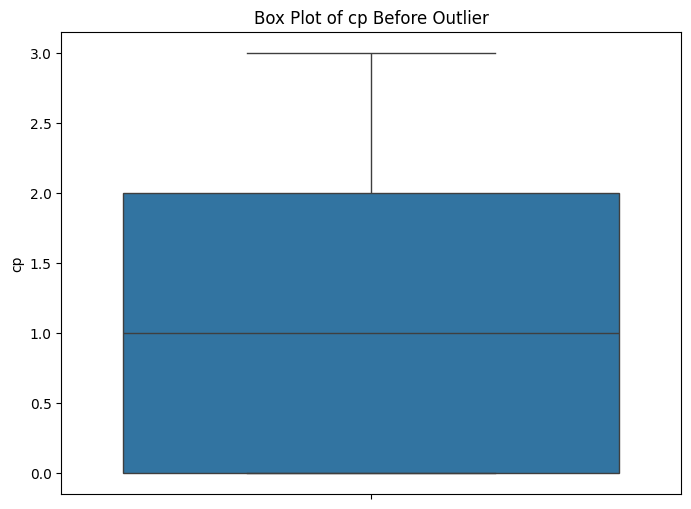

After Removing Outliers


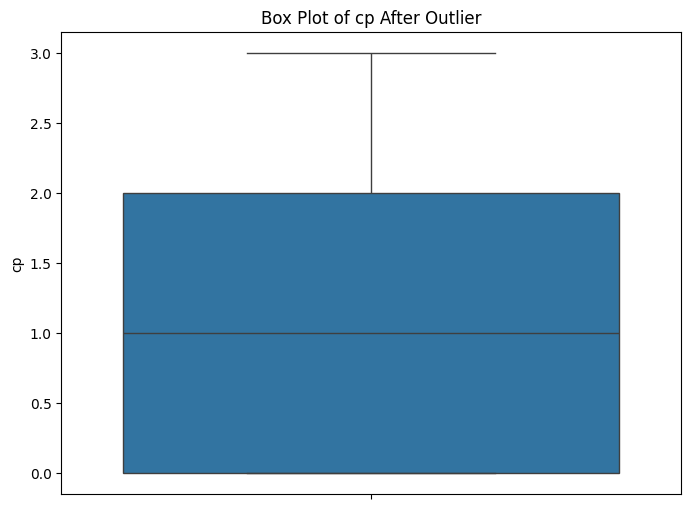

Before Removing Outliers


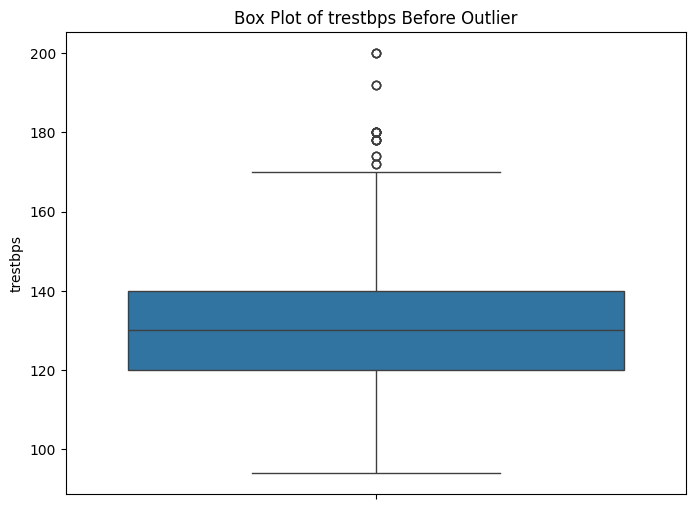

After Removing Outliers


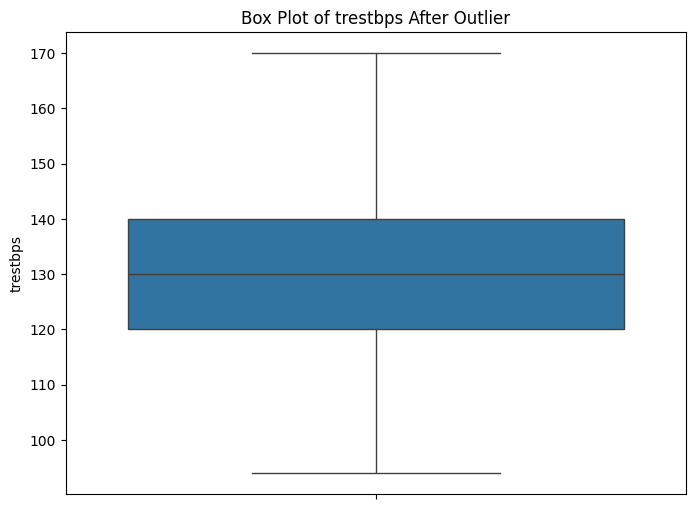

Before Removing Outliers


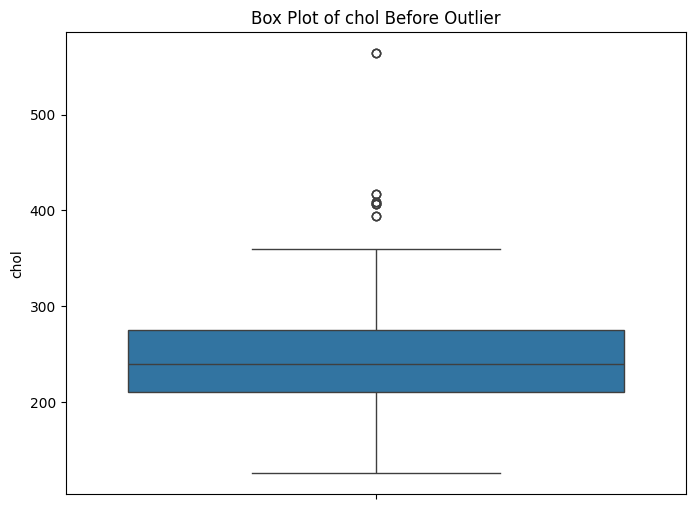

After Removing Outliers


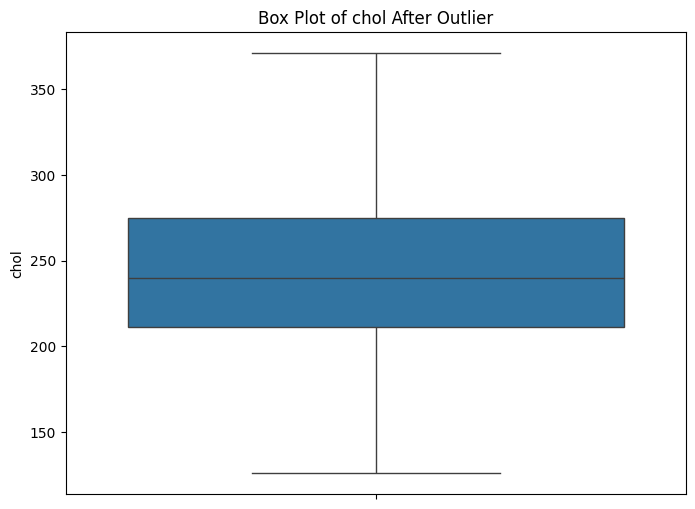

Before Removing Outliers


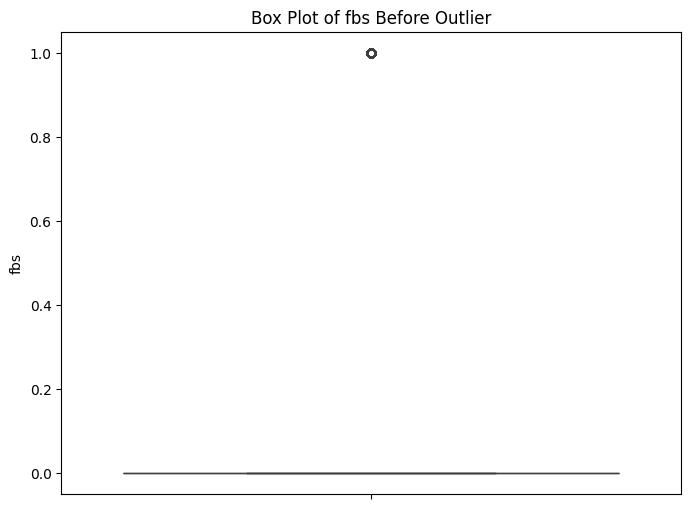

After Removing Outliers


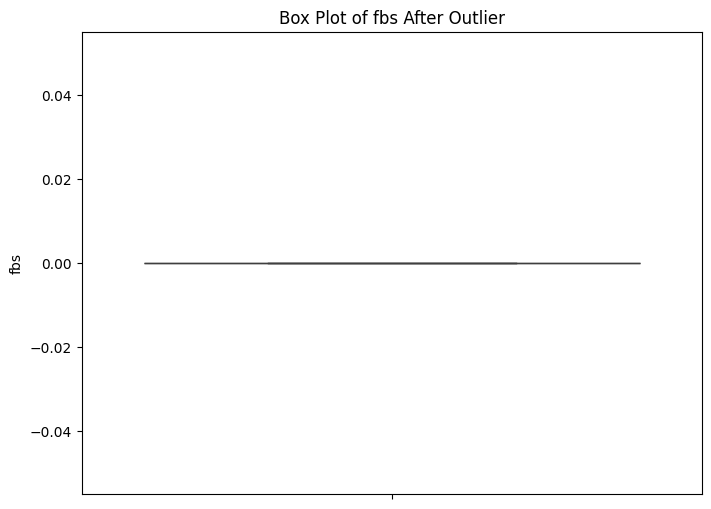

Before Removing Outliers


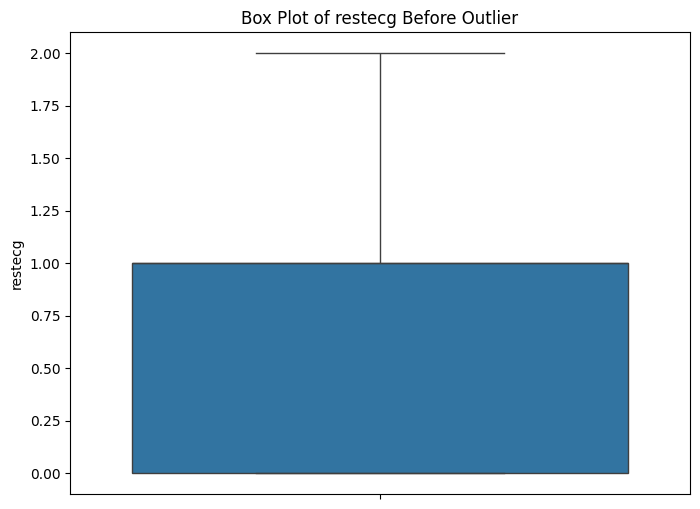

After Removing Outliers


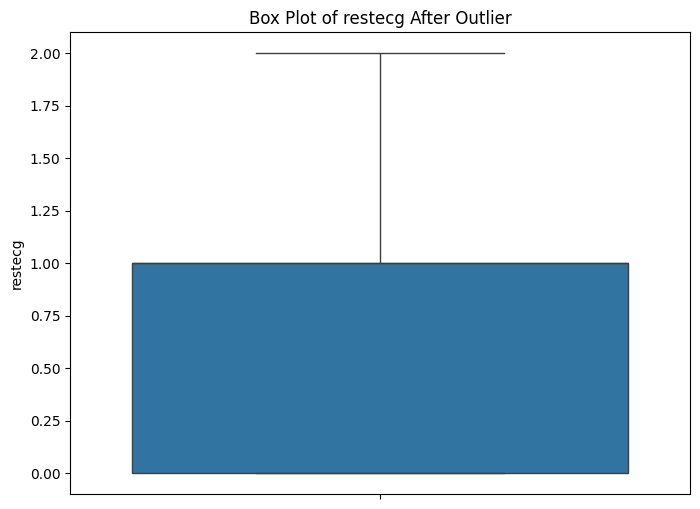

Before Removing Outliers


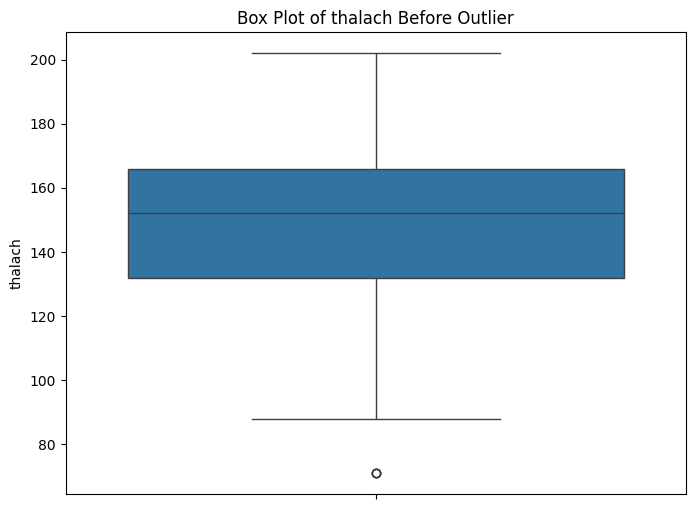

After Removing Outliers


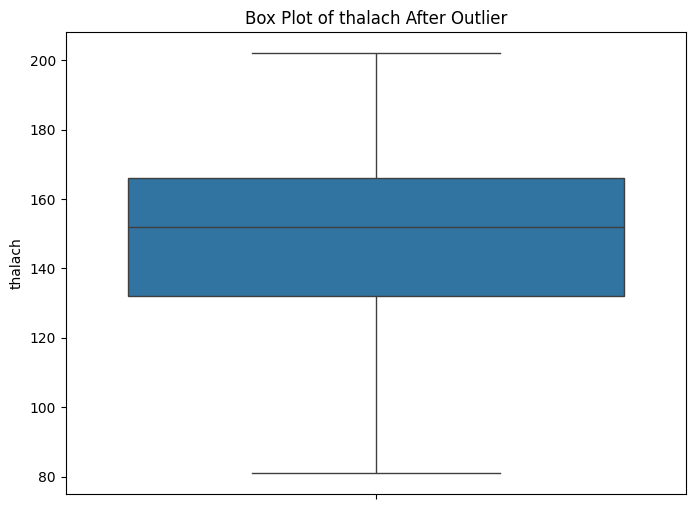

Before Removing Outliers


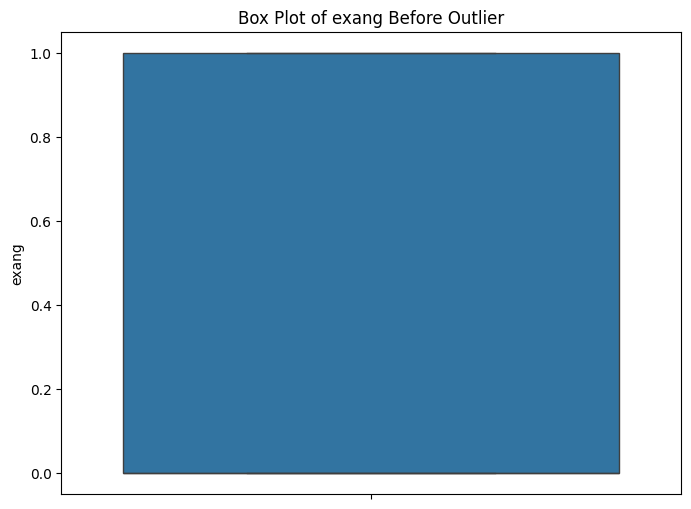

After Removing Outliers


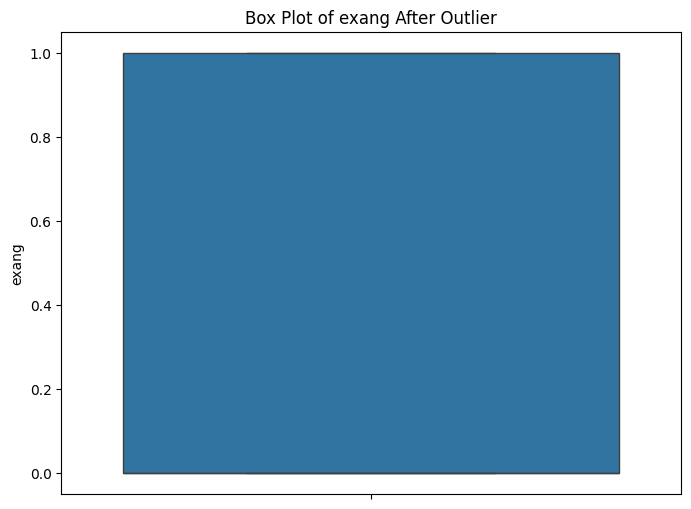

Before Removing Outliers


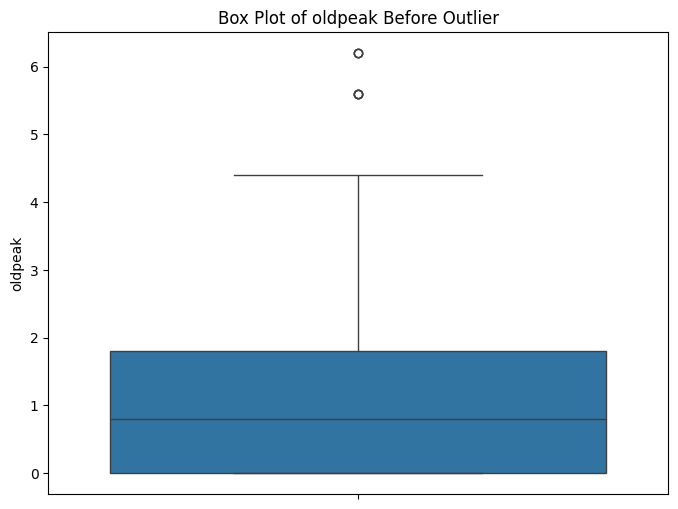

After Removing Outliers


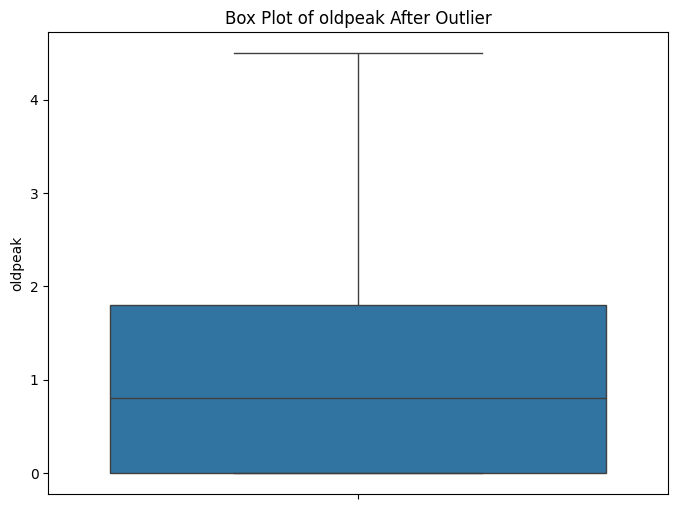

Before Removing Outliers


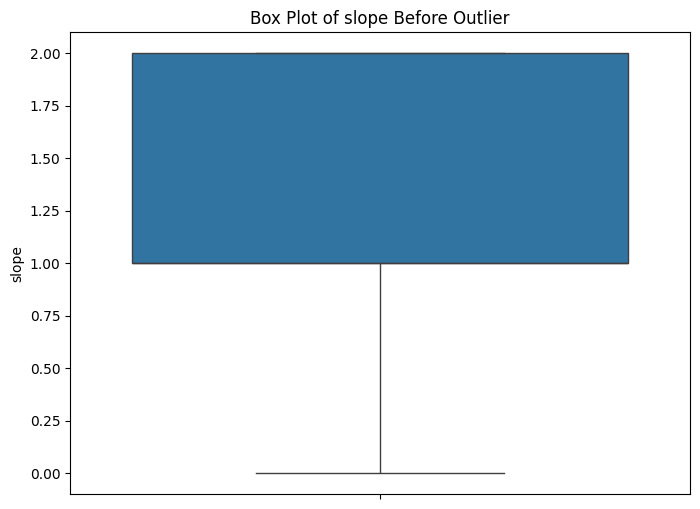

After Removing Outliers


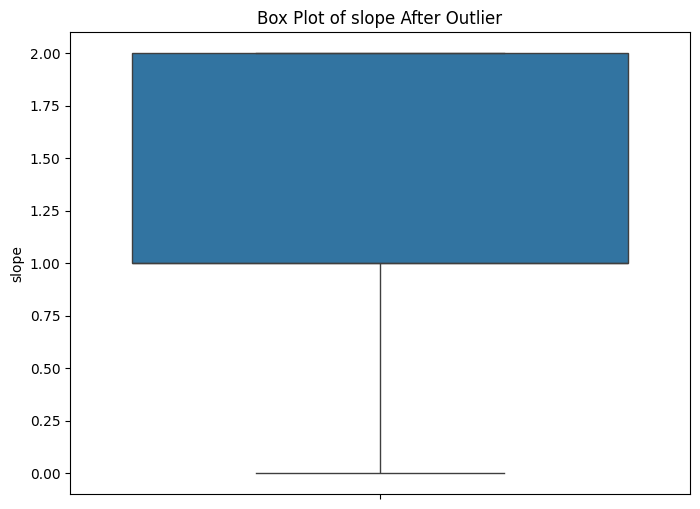

Before Removing Outliers


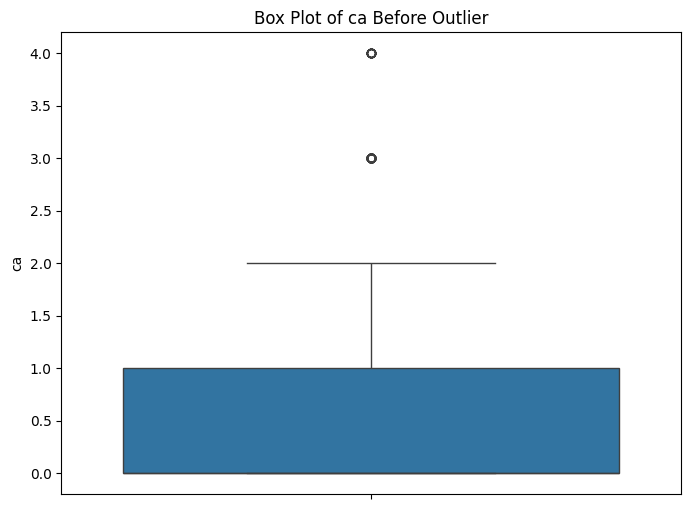

After Removing Outliers


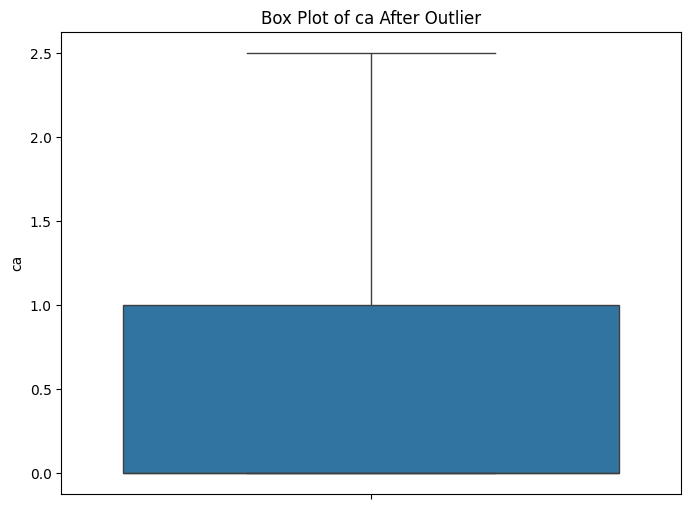

Before Removing Outliers


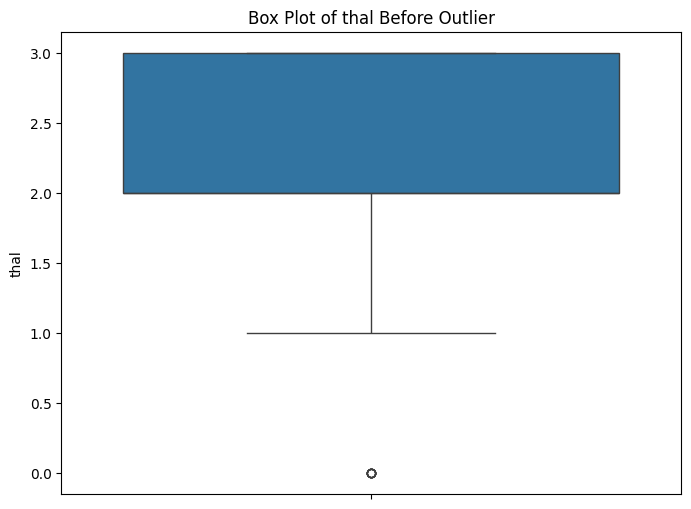

After Removing Outliers


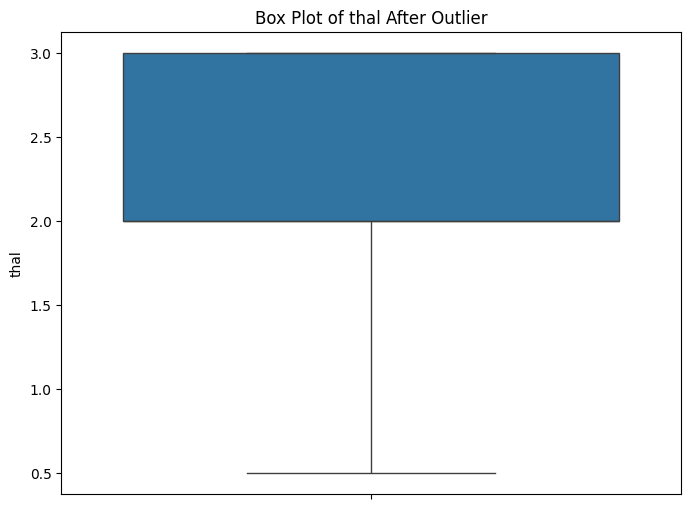

Before Removing Outliers


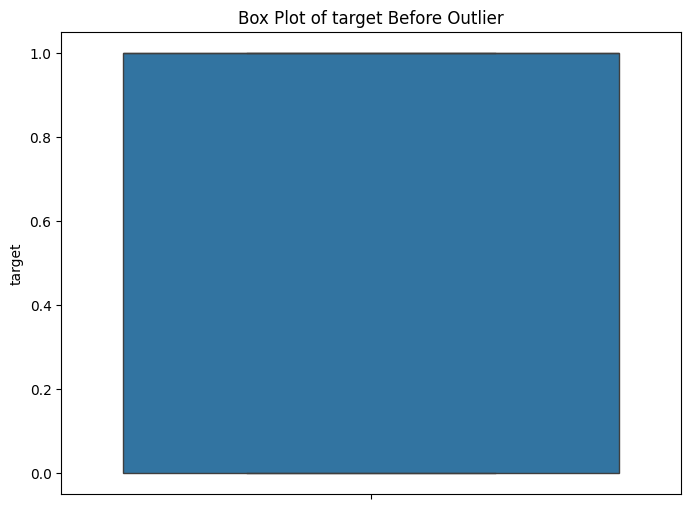

After Removing Outliers


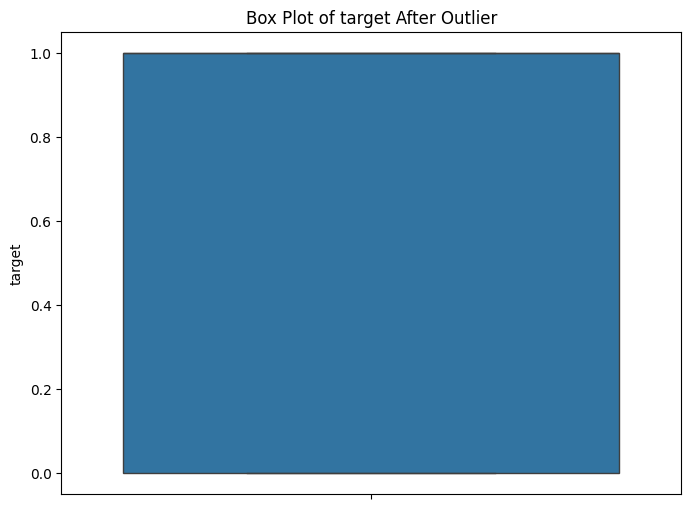

In [8]:
for column in data:
  print("Before Removing Outliers")

  outlier('Before Outlier',column)

  print("After Removing Outliers")

  #outlier is removed using iqr capping method
  q1 = data[column].quantile(0.25)
  q3 = data[column].quantile(0.75)
  iqr = q3-q1
  lb = q1 - 1.5 * iqr
  ub = q3 + 1.5 * iqr
  data.loc[(data[column] < lb),column] = lb
  data.loc[(data[column] > ub),column] = ub

  outlier('After Outlier',column)

## **DATA VISUALISATION**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   float64
 1   sex       1025 non-null   float64
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   float64
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   float64
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   float64
 11  ca        1025 non-null   float64
 12  thal      1025 non-null   float64
 13  target    1025 non-null   float64
dtypes: float64(9), int64(5)
memory usage: 112.2 KB


**Heart Disease Rates by Gender**

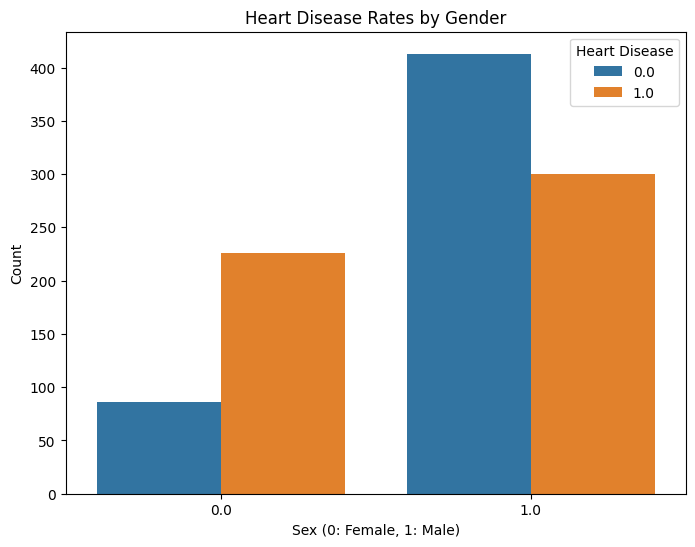

In [10]:
# Plot heart disease rates by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='target', data=data)
plt.title('Heart Disease Rates by Gender')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()

**Heart Disease Rates by Age**

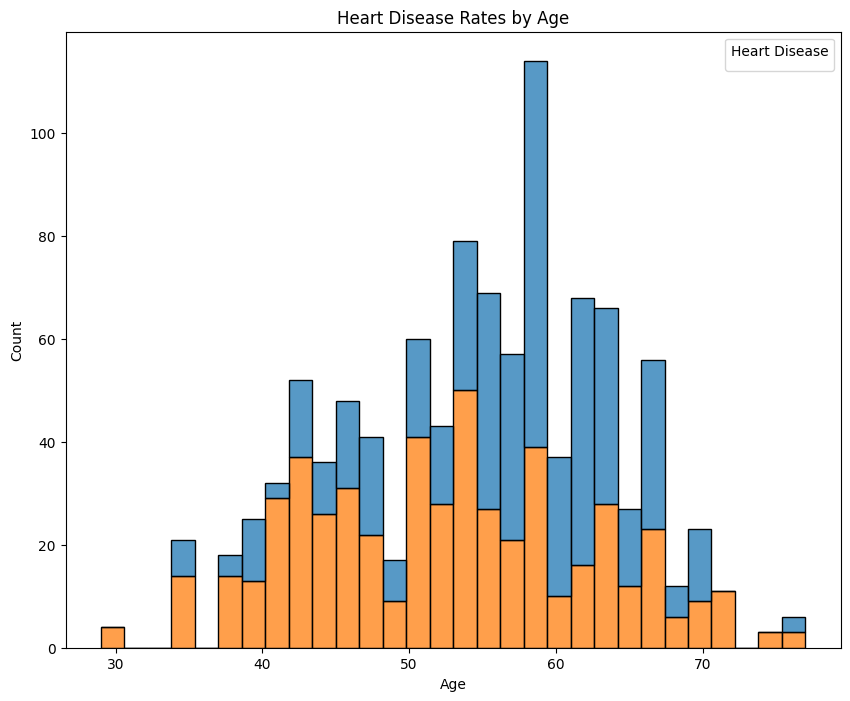

In [11]:
# Plot heart disease rates by age
plt.figure(figsize=(10, 8))
sns.histplot(data=data, x='age', hue='target', multiple='stack', bins=30)
plt.title('Heart Disease Rates by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()


**Box Plot of Cholesterol Levels by Heart Disease**

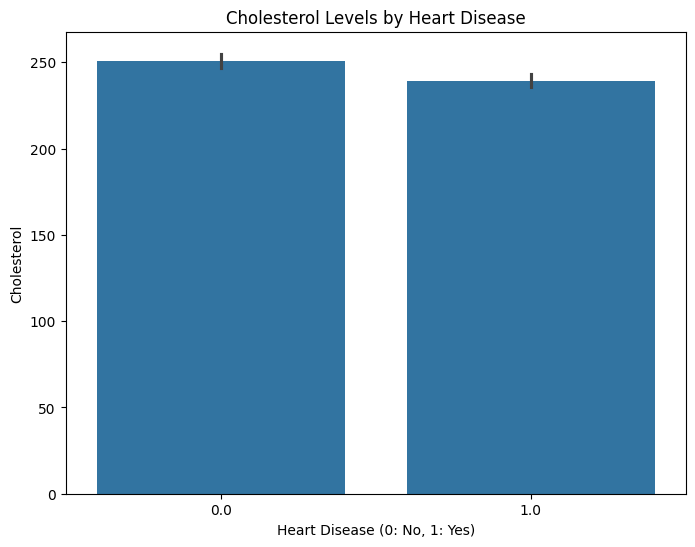

In [17]:
# Plot box plot of cholesterol levels by heart disease
plt.figure(figsize=(8, 6))
sns.barplot(x='target', y='chol', data=data)
plt.title('Cholesterol Levels by Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Cholesterol')
plt.show()

**Heart Disease by Chest Pain Type**

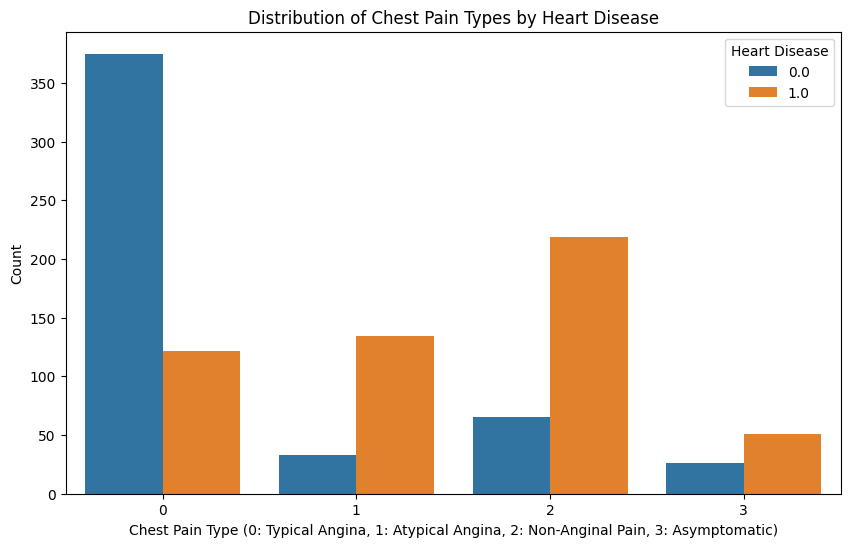

In [24]:
# Plot chest pain types by heart disease
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=data)
plt.title('Distribution of Chest Pain Types by Heart Disease')
plt.xlabel('Chest Pain Type (0: Typical Angina, 1: Atypical Angina, 2: Non-Anginal Pain, 3: Asymptomatic)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()


**Max Heart Rate Achieved (thalach) Analysis**

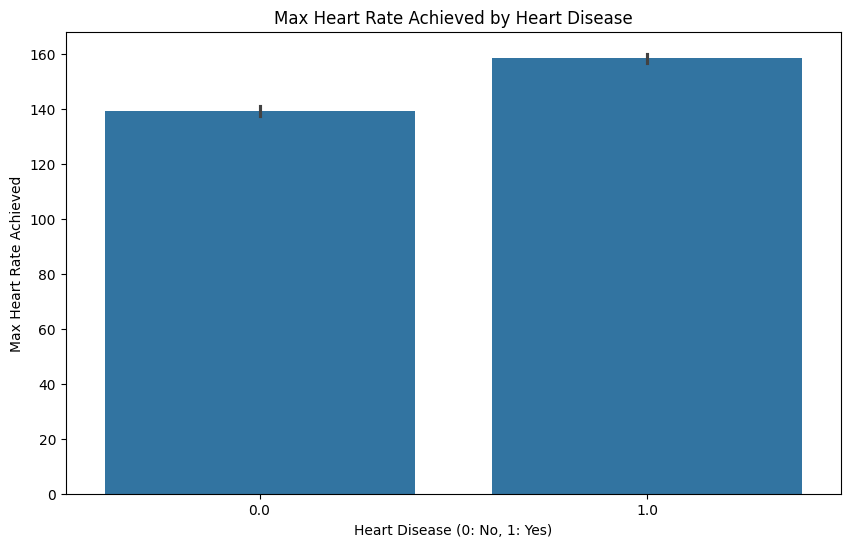

In [27]:
# Plot max heart rate achieved by heart disease
plt.figure(figsize=(10, 6))
sns.barplot(x='target', y='thalach', data=data)
plt.title('Max Heart Rate Achieved by Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Max Heart Rate Achieved')
plt.show()

**Exercise Induced Angina (exang) Analysis**

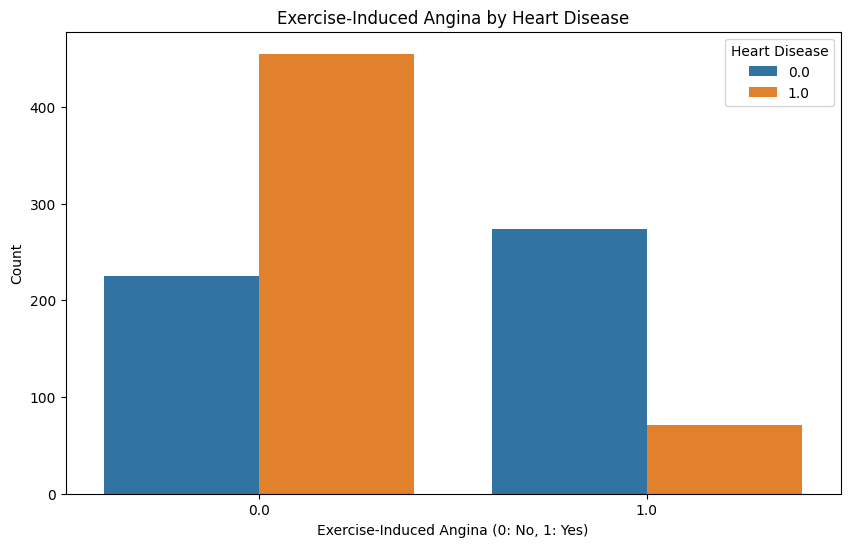

In [28]:
# Plot exercise-induced angina by heart disease
plt.figure(figsize=(10, 6))
sns.countplot(x='exang', hue='target', data=data)
plt.title('Exercise-Induced Angina by Heart Disease')
plt.xlabel('Exercise-Induced Angina (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()

**Pair Plot of Selected Attributes**

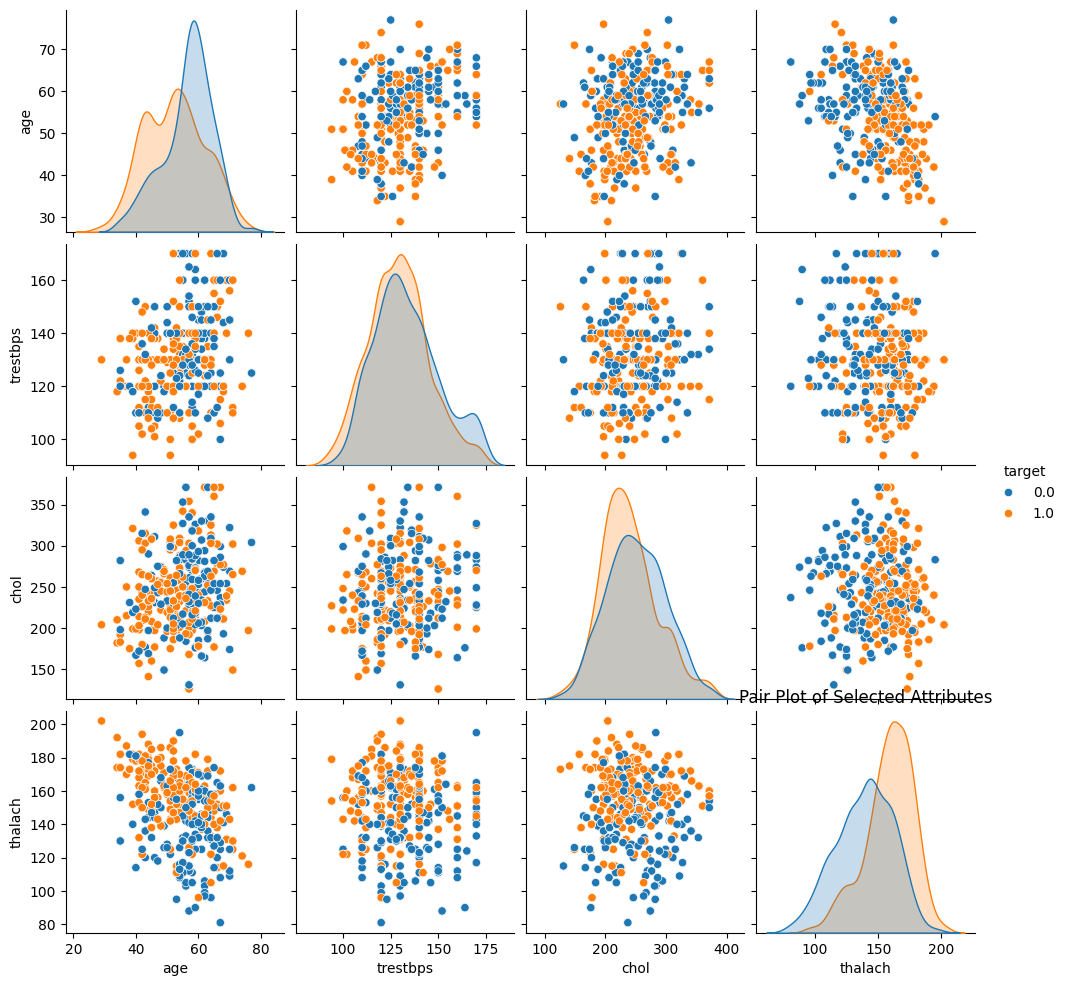

In [13]:
# Plot pair plot of selected attributes
selected_attributes = ['age', 'trestbps', 'chol', 'thalach', 'target']
sns.pairplot(data[selected_attributes], hue='target')
plt.title('Pair Plot of Selected Attributes')
plt.show()

**Box Plot of Cholesterol Levels by Heart Disease**

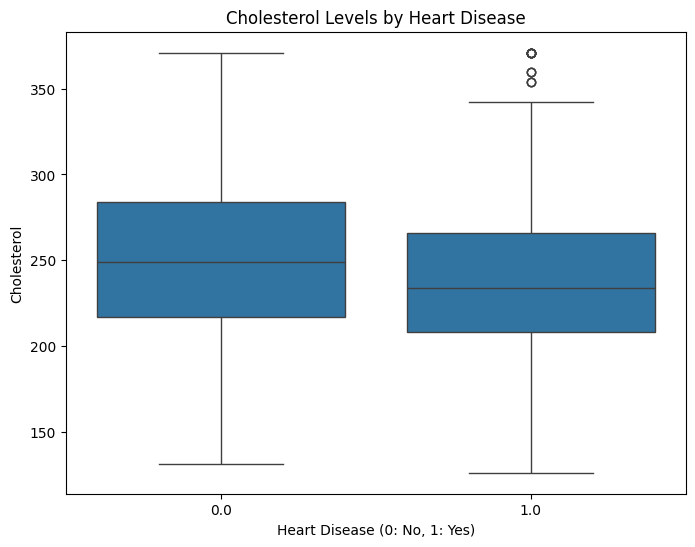

In [15]:
# Plot box plot of cholesterol levels by heart disease
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='chol', data=data)
plt.title('Cholesterol Levels by Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Cholesterol')
plt.show()

**Correlation Heatmap**

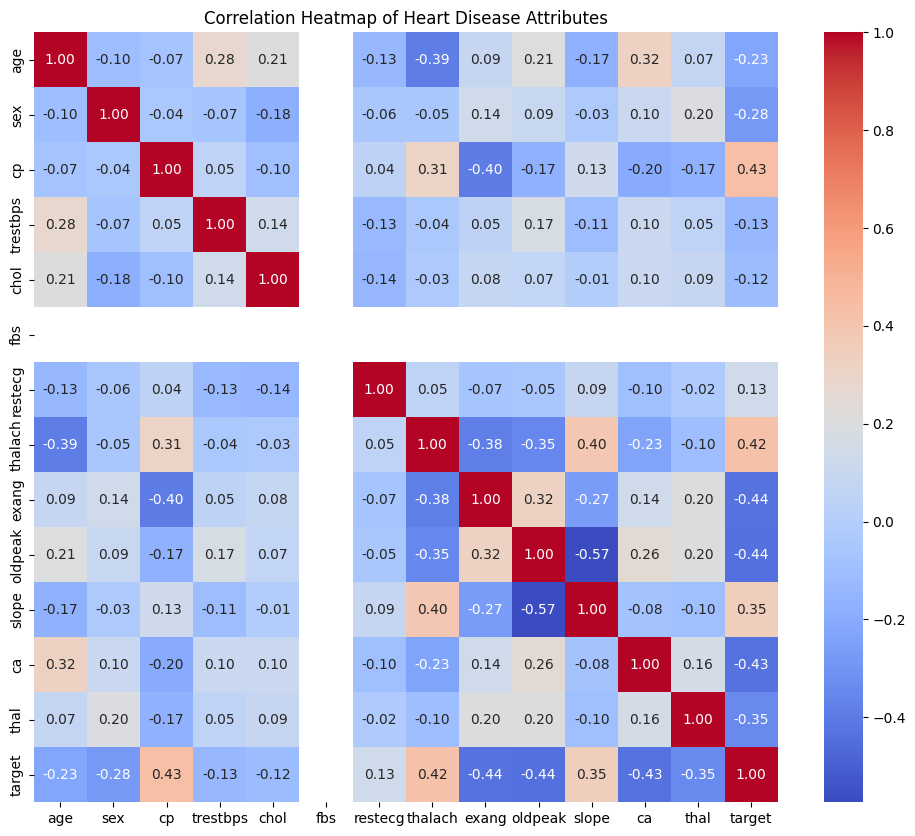

In [14]:
# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Heart Disease Attributes')
plt.show()

## **MODEL SELECTION AND MODEL EVALUATION**

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   float64
 1   sex       1025 non-null   float64
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   float64
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   float64
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   float64
 11  ca        1025 non-null   float64
 12  thal      1025 non-null   float64
 13  target    1025 non-null   float64
dtypes: float64(9), int64(5)
memory usage: 112.2 KB


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay,precision_recall_curve, roc_curve, roc_auc_score,auc
from sklearn.preprocessing import StandardScaler,LabelEncoder


**Label Encoding**

In [32]:
# X as independent variables(input columns) and y as dependent varible(output columns)
X = data.drop('target',axis=1)
y = data['target']


**Standard Scaler**

In [33]:
scaler = StandardScaler()

In [35]:
X = scaler.fit_transform(X)

In [36]:
# Data is splitted into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
data['target'].unique()

array([0., 1.])

**Logistic Regression**

In [37]:
log_model = LogisticRegression()

#training the model
log_model.fit(X_train, y_train)

#model is predicted with test data
log_pred = log_model.predict(X_test)

Accuracy :  0.7853658536585366


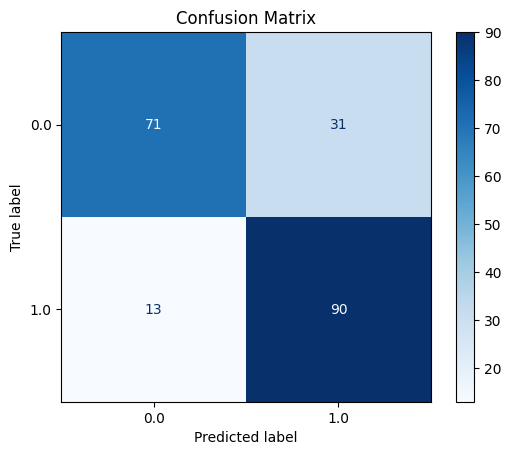

In [38]:

#computing the accuracy of the model
log_accuracy = accuracy_score(y_test, log_pred)
print("Accuracy : ", log_accuracy )

# Compute the confusion matrix
log_cm = confusion_matrix(y_test, log_pred)

# Plot the confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_model.classes_)
log_disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [43]:
# Print the classification report
print(classification_report(y_test, log_pred, target_names=['normal','fixed defect']))

              precision    recall  f1-score   support

      normal       0.85      0.70      0.76       102
fixed defect       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



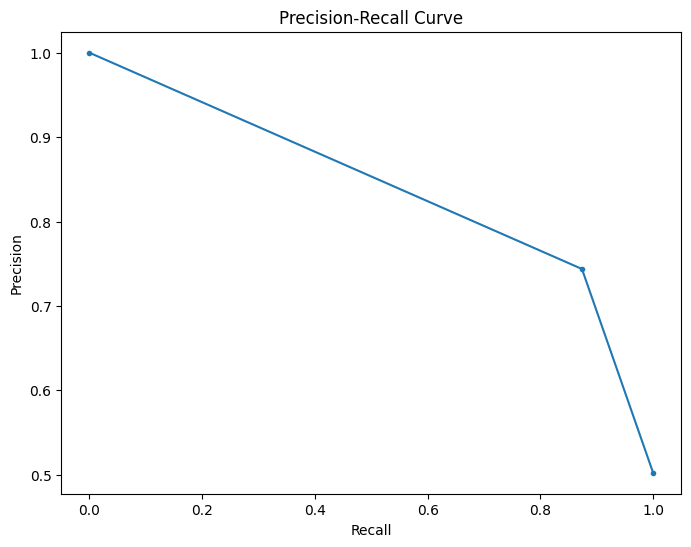

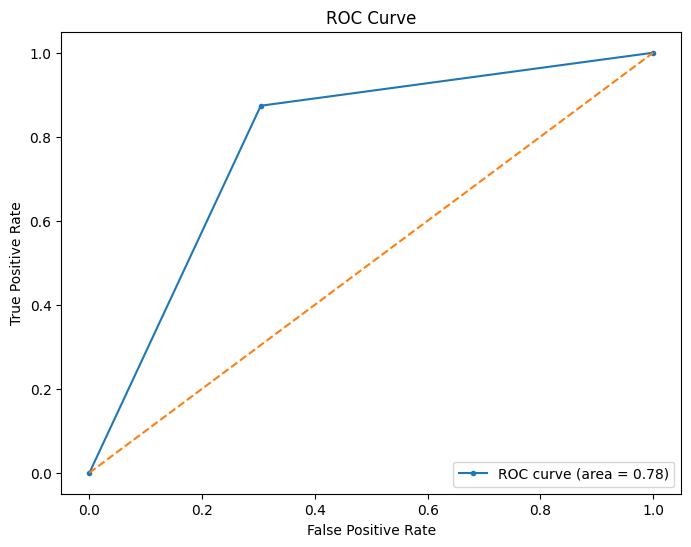

In [44]:

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, log_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, log_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

**KNeighborsClassifier**

In [45]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

Accuracy :  0.8195121951219512


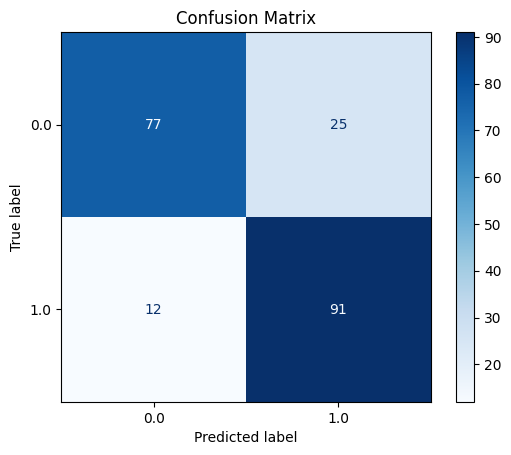

In [46]:
knn_accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy : ", knn_accuracy )

knn_cm = confusion_matrix(y_test, knn_pred)

knn_disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn_model.classes_)
knn_disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [47]:
# Print the classification report
print(classification_report(y_test, knn_pred, target_names=['normal','fixed defect']))

              precision    recall  f1-score   support

      normal       0.87      0.75      0.81       102
fixed defect       0.78      0.88      0.83       103

    accuracy                           0.82       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.82      0.82      0.82       205



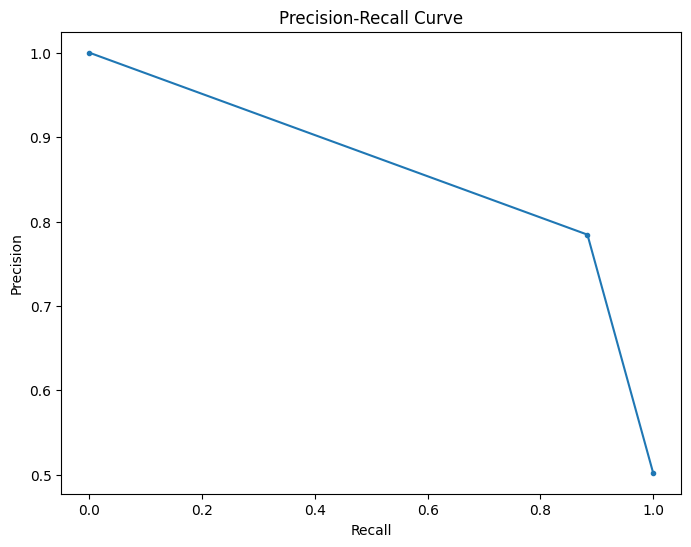

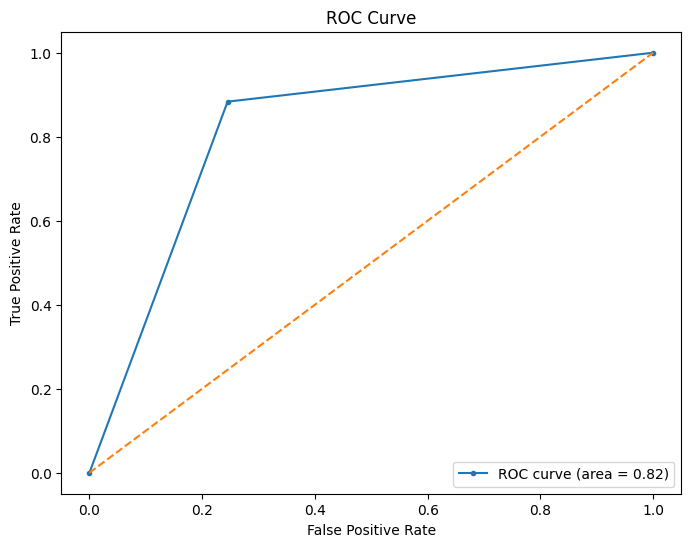

In [48]:

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, knn_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, knn_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

**DecisionTreeClassifier**

In [49]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

Accuracy :  0.9853658536585366


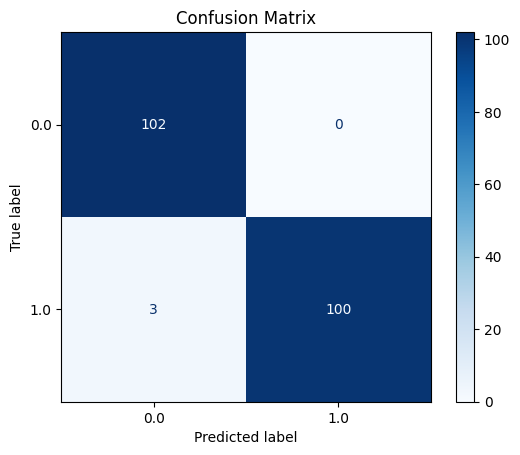

In [50]:
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy : ", dt_accuracy )

dt_cm = confusion_matrix(y_test, dt_pred)

dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=dt_model.classes_)
dt_disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [51]:
# Print the classification report
print(classification_report(y_test, dt_pred, target_names=['normal','fixed defect']))

              precision    recall  f1-score   support

      normal       0.97      1.00      0.99       102
fixed defect       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



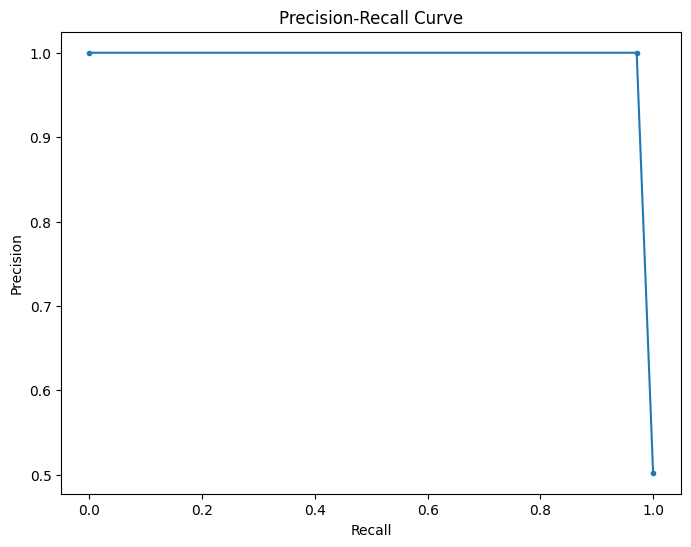

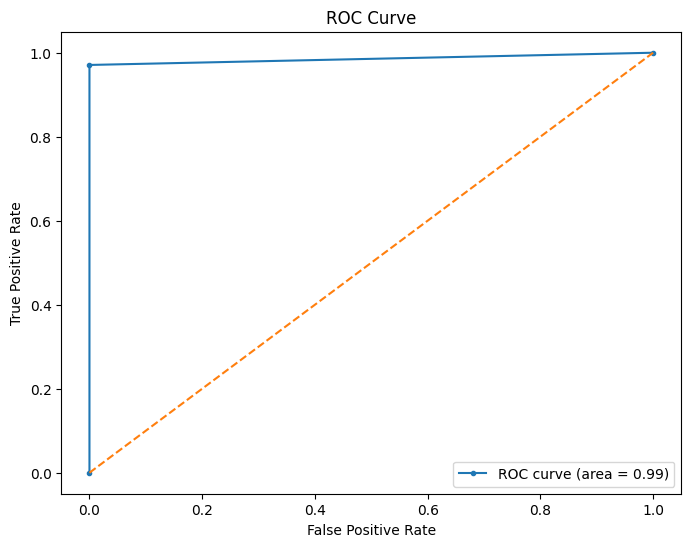

In [52]:

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, dt_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, dt_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

**RandomForestClassifier**

In [53]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

Accuracy :  0.9853658536585366


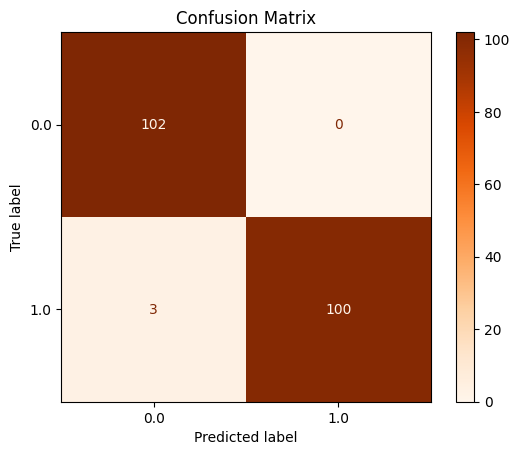

In [54]:
rf_accuracy = accuracy_score(y_test,rf_pred)
print("Accuracy : ", rf_accuracy)

rf_cm = confusion_matrix(y_test,rf_pred)

rf_disp = ConfusionMatrixDisplay(confusion_matrix = rf_cm, display_labels = rf_model.classes_)
rf_disp.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix")
plt.show()

In [55]:
# Print the classification report
print(classification_report(y_test, rf_pred, target_names=['normal','fixed defect']))

              precision    recall  f1-score   support

      normal       0.97      1.00      0.99       102
fixed defect       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



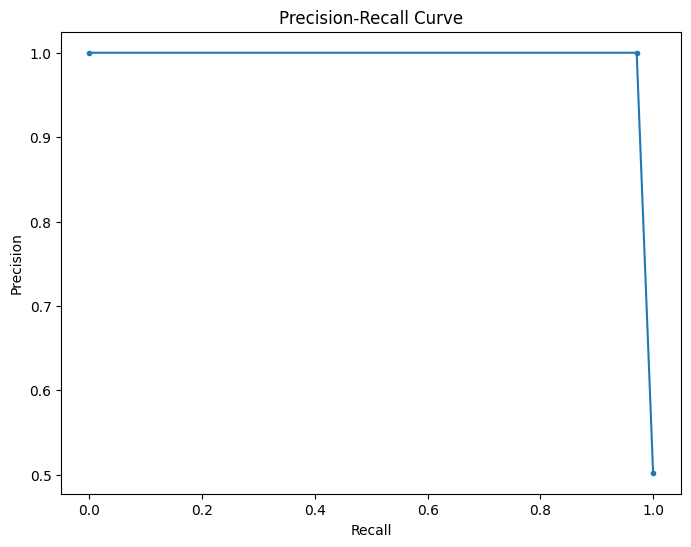

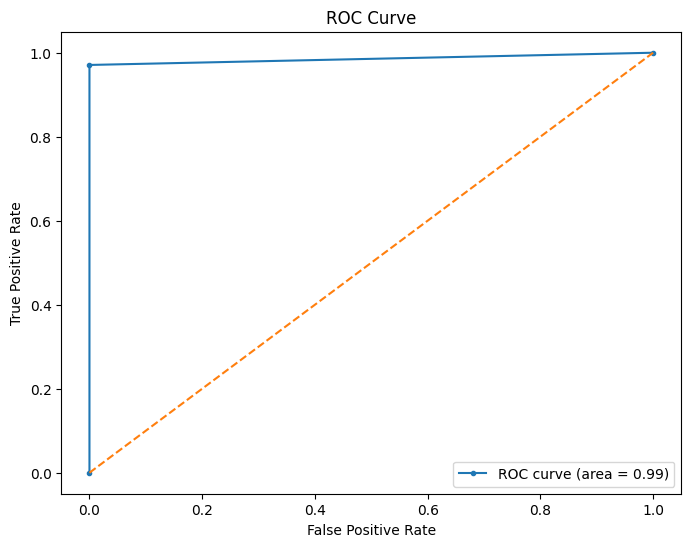

In [56]:

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, rf_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

**GradientBoostingClassifier**

In [57]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

Accuracy :  0.9365853658536586


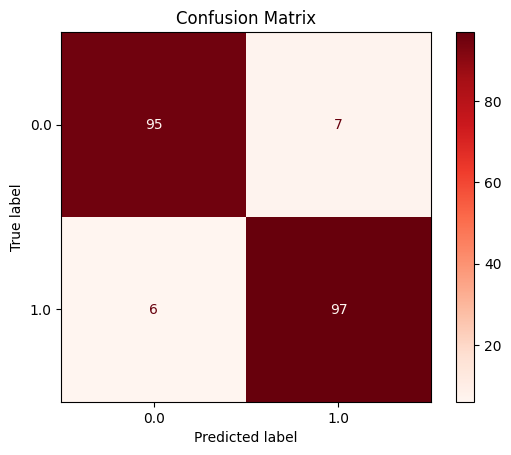

In [58]:
gb_accuracy = accuracy_score(y_test,gb_pred)
print("Accuracy : ", gb_accuracy)

gb_cm = confusion_matrix(y_test,gb_pred)

gb_disp = ConfusionMatrixDisplay(confusion_matrix = gb_cm, display_labels = gb_model.classes_)
gb_disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()

In [59]:
# Print the classification report
print(classification_report(y_test, gb_pred, target_names=['normal','fixed defect']))

              precision    recall  f1-score   support

      normal       0.94      0.93      0.94       102
fixed defect       0.93      0.94      0.94       103

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



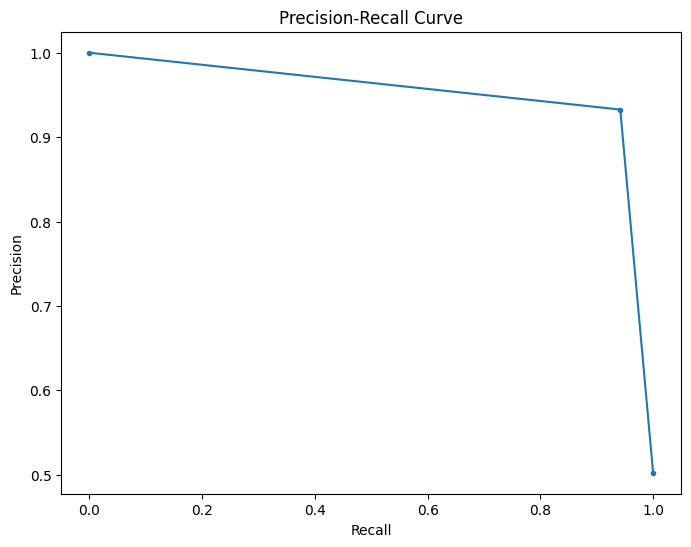

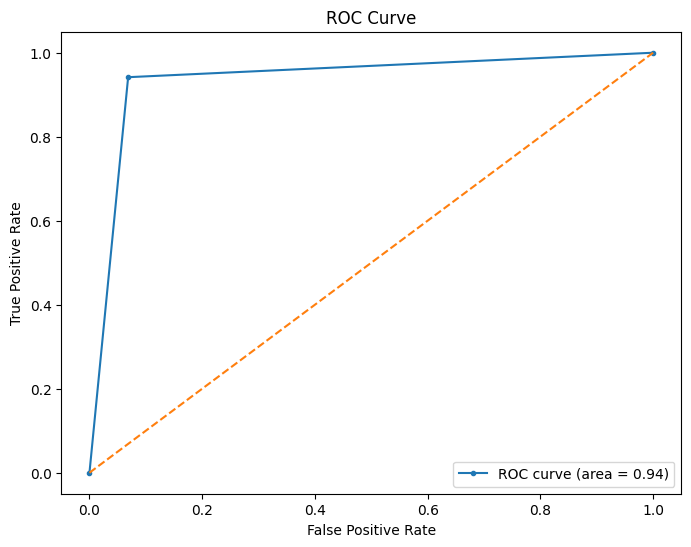

In [60]:

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, gb_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, gb_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

**AdaBoostClassifier**

In [61]:
ab_model = AdaBoostClassifier()
ab_model.fit(X_train, y_train)
ab_pred = ab_model.predict(X_test)

Accuracy :  0.8292682926829268


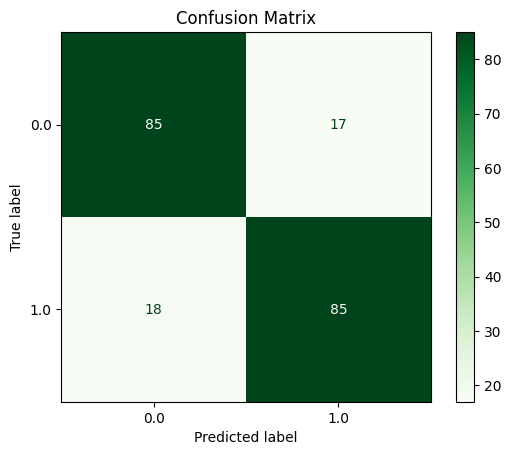

In [62]:
ab_accuracy = accuracy_score(y_test,ab_pred)
print("Accuracy : ", ab_accuracy)

ab_cm = confusion_matrix(y_test,ab_pred)

ab_disp = ConfusionMatrixDisplay(confusion_matrix = ab_cm, display_labels = ab_model.classes_)
ab_disp.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.show()

In [63]:
# Print the classification report
print(classification_report(y_test, ab_pred, target_names=['normal','fixed defect']))

              precision    recall  f1-score   support

      normal       0.83      0.83      0.83       102
fixed defect       0.83      0.83      0.83       103

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



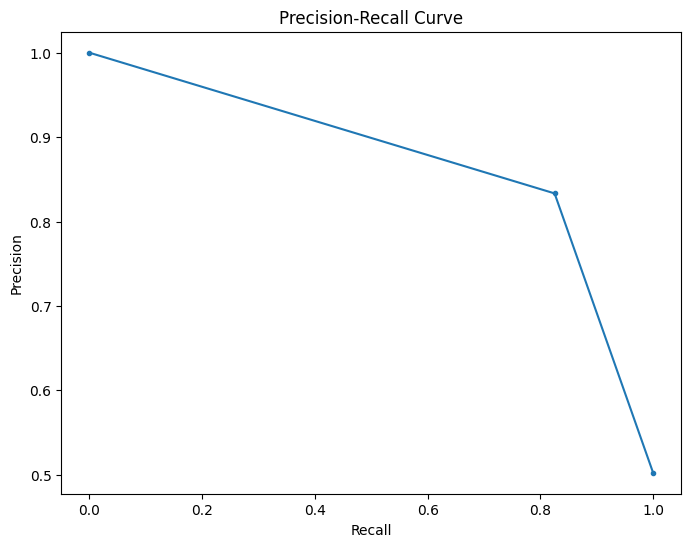

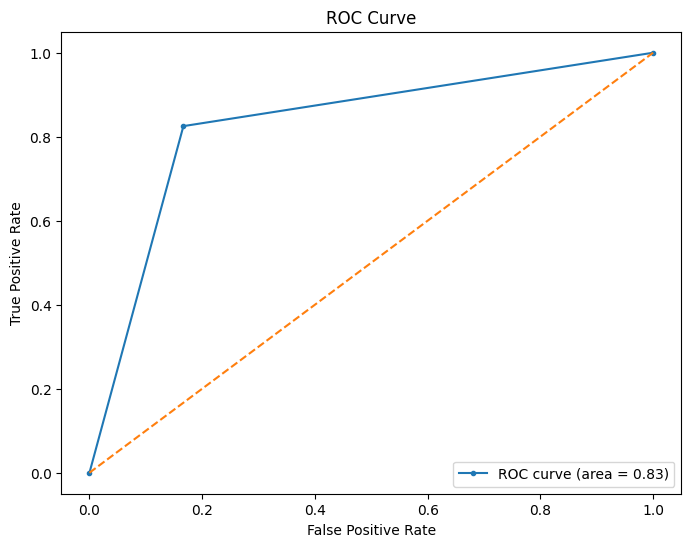

In [64]:

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, ab_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, ab_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

**XGBClassifier**

In [65]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

Accuracy :  0.9853658536585366


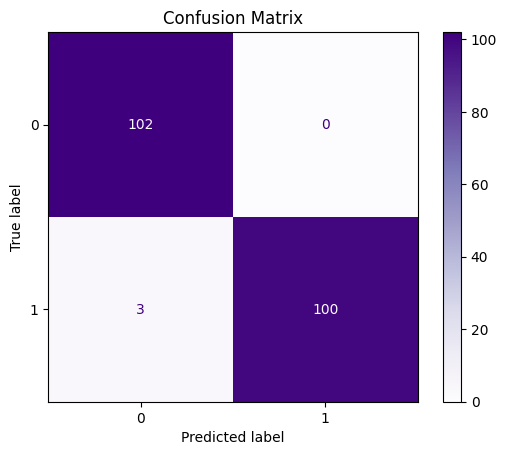

In [66]:
xgb_accuracy = accuracy_score(y_test,xgb_pred)
print("Accuracy : ", xgb_accuracy)

xgb_cm = confusion_matrix(y_test,xgb_pred)

xgb_disp = ConfusionMatrixDisplay(confusion_matrix = xgb_cm, display_labels = xgb_model.classes_)
xgb_disp.plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix")
plt.show()

In [67]:
# Print the classification report
print(classification_report(y_test, xgb_pred, target_names=['normal','fixed defect']))

              precision    recall  f1-score   support

      normal       0.97      1.00      0.99       102
fixed defect       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



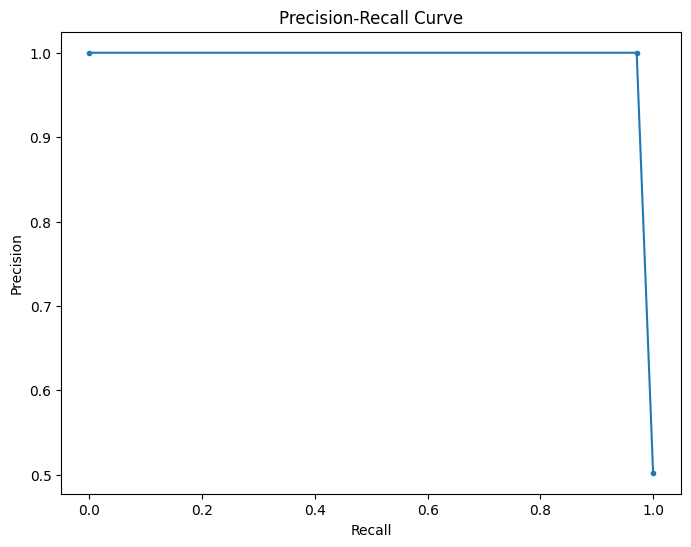

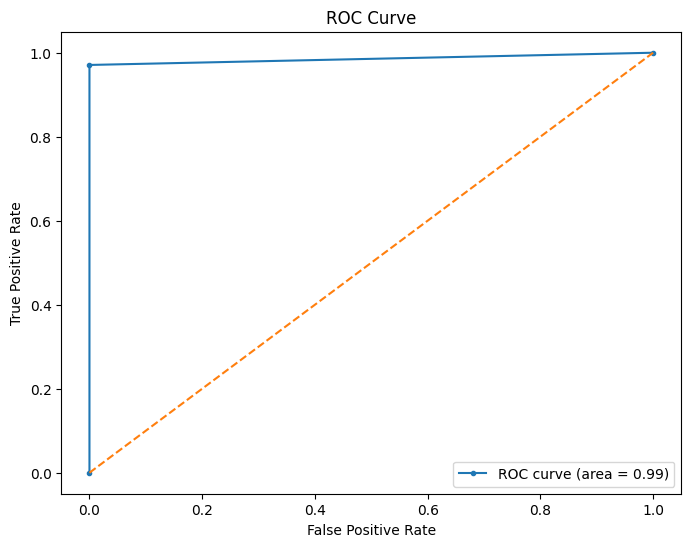

In [68]:

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, xgb_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, xgb_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

**SVC**

In [69]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

Accuracy :  0.8634146341463415


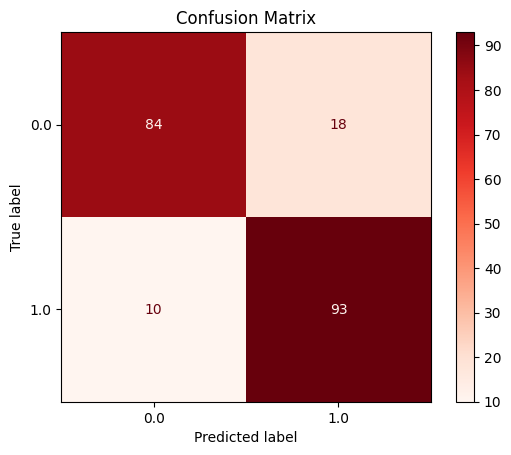

In [70]:
svc_accuracy = accuracy_score(y_test,svc_pred)
print("Accuracy : ", svc_accuracy)

svc_cm = confusion_matrix(y_test,svc_pred)

svc_disp = ConfusionMatrixDisplay(confusion_matrix = svc_cm, display_labels = svc_model.classes_)
svc_disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()

In [71]:
# Print the classification report
print(classification_report(y_test, svc_pred, target_names=['normal','fixed defect']))

              precision    recall  f1-score   support

      normal       0.89      0.82      0.86       102
fixed defect       0.84      0.90      0.87       103

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



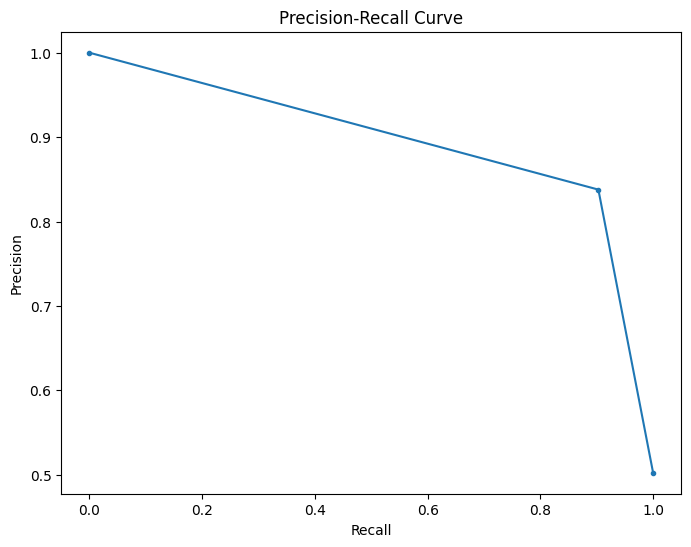

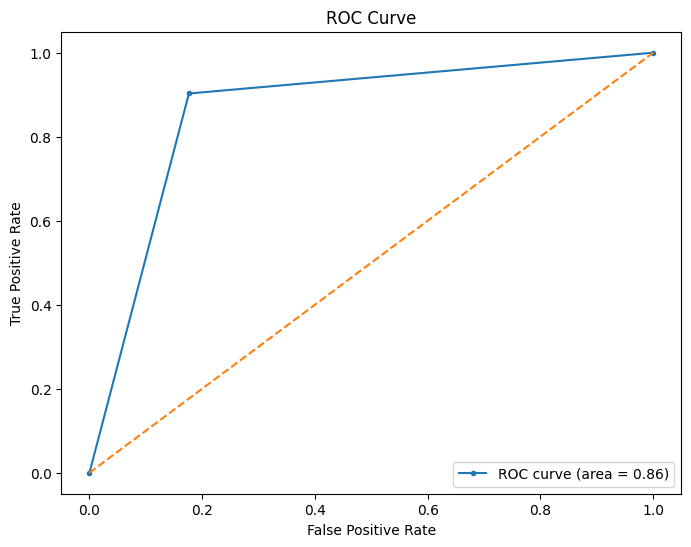

In [72]:

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, svc_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, svc_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

**GaussianNB**

In [73]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_pred = gnb_model.predict(X_test)

Accuracy :  0.8


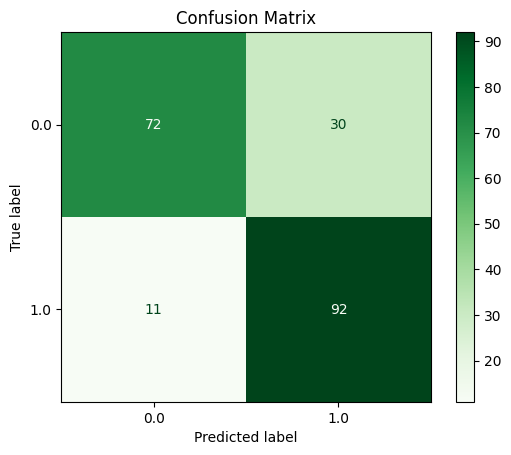

In [74]:
gnb_accuracy = accuracy_score(y_test,gnb_pred)
print("Accuracy : ", gnb_accuracy)

gnb_cm = confusion_matrix(y_test,gnb_pred)

gnb_disp = ConfusionMatrixDisplay(confusion_matrix = gnb_cm, display_labels = gnb_model.classes_)
gnb_disp.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.show()

In [76]:
# Print the classification report
print(classification_report(y_test, gnb_pred, target_names=['normal','fixed defect']))

              precision    recall  f1-score   support

      normal       0.87      0.71      0.78       102
fixed defect       0.75      0.89      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



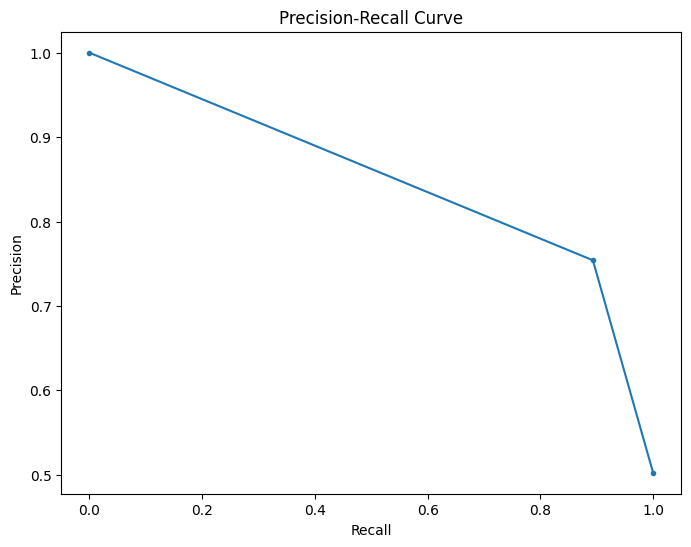

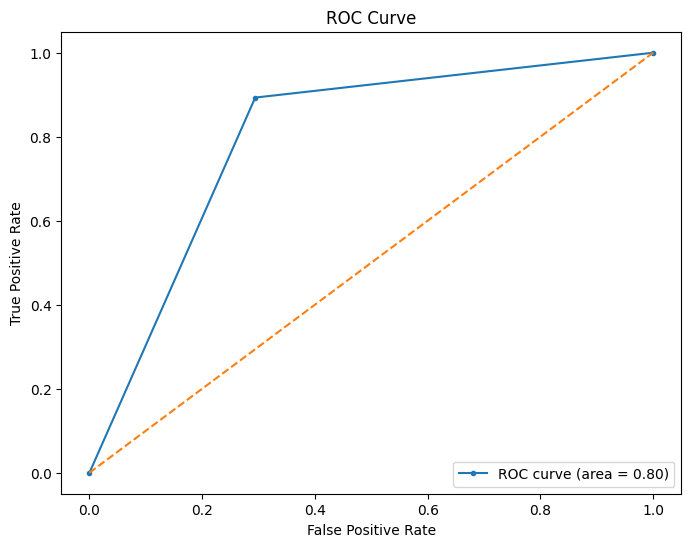

In [77]:

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, gnb_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, gnb_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

**MLPClassifier**

In [78]:
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy :  0.8878048780487805


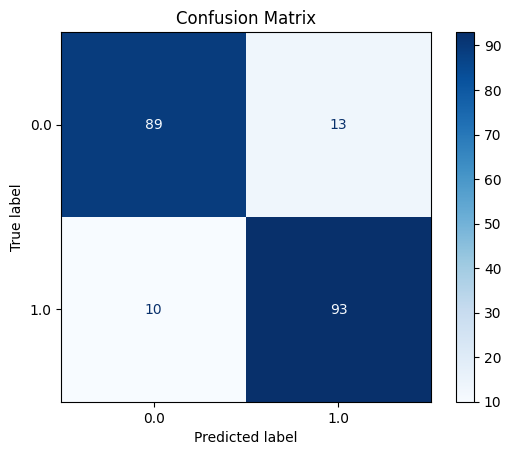

In [79]:
mlp_accuracy = accuracy_score(y_test,mlp_pred)
print("Accuracy : ", mlp_accuracy)

mlp_cm = confusion_matrix(y_test,mlp_pred)

mlp_disp = ConfusionMatrixDisplay(confusion_matrix = mlp_cm, display_labels = mlp_model.classes_)
mlp_disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [81]:
# Print the classification report
print(classification_report(y_test, mlp_pred, target_names=['normal','fixed defect']))

              precision    recall  f1-score   support

      normal       0.90      0.87      0.89       102
fixed defect       0.88      0.90      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



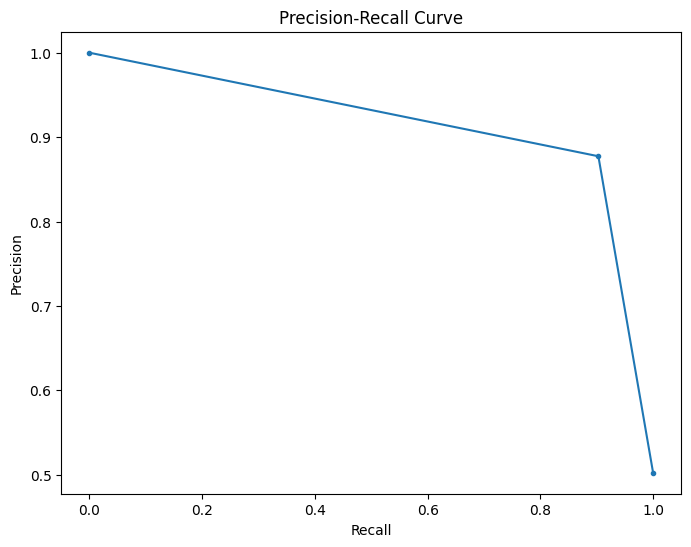

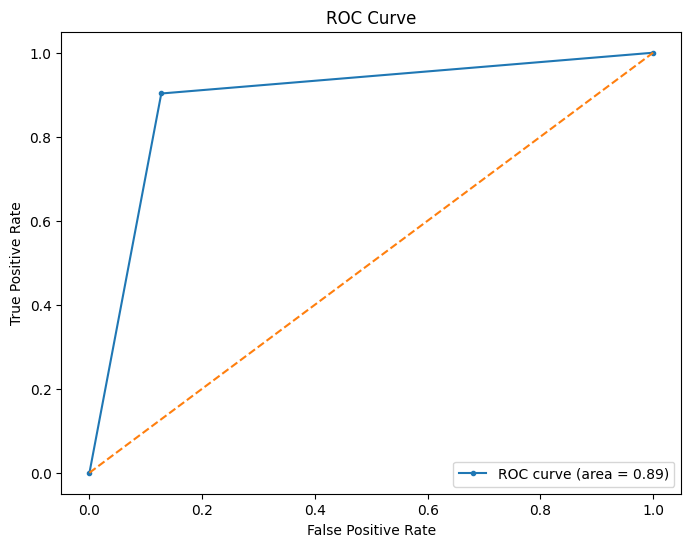

In [82]:

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, mlp_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, mlp_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## **COMPARISON OF MODELS**

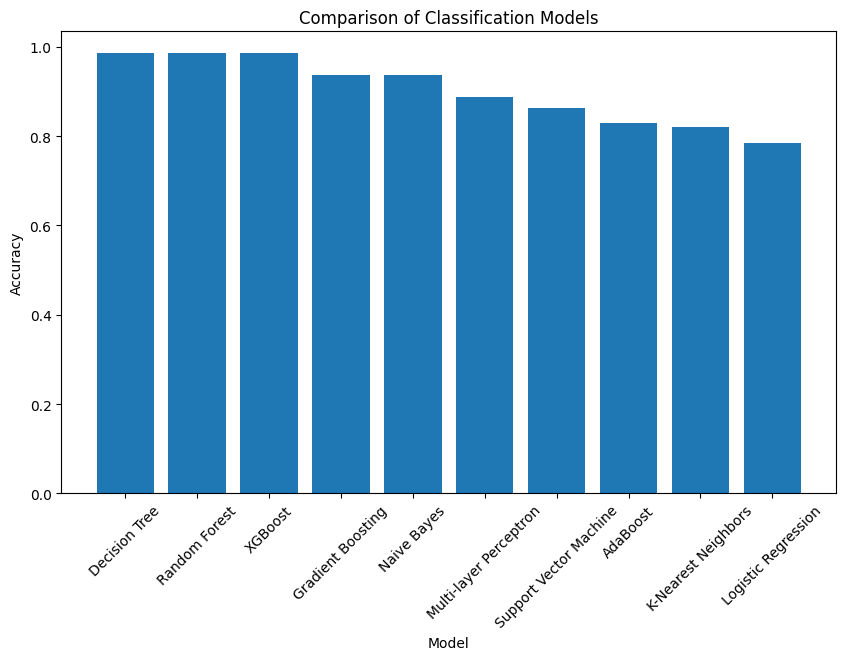

In [83]:

# Create a dictionary to store model names and their R2 values
models_accuracy = {
    "Logistic Regression": log_accuracy,
    "K-Nearest Neighbors": knn_accuracy,
    "Support Vector Machine": svc_accuracy,
    "Decision Tree": dt_accuracy,
    "Random Forest": rf_accuracy,
    "Gradient Boosting": gb_accuracy,
    "AdaBoost": ab_accuracy,
    "Naive Bayes": gb_accuracy,
    "Multi-layer Perceptron": mlp_accuracy,
    "XGBoost": xgb_accuracy
}

# Sort models by descending order of accuracy
sorted_models_accuracy = dict(sorted(models_accuracy.items(), key=lambda item: item[1],reverse = True))

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.bar(sorted_models_accuracy.keys(), sorted_models_accuracy.values())
plt.title('Comparison of Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()
